AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'
                 clusters_coarse       clusters   S_score  G2M_score
index                                                               
AAACCTGAGAGGGATA   Pre-endocrine  Pre-endocrine -0.224902  -0.252071
AAACCTGAGCCTTGAT          Ductal         Ductal -0.014707  -0.232610
AAACCTGAGGCAATTA       Endocrine          Alpha -0.171255  -0.286834
AAACCTGCATCATCCC          Ductal         Ductal  0.599244   0.191243
AAACCTGGTAAGTGGC    Ngn3 high EP   Ngn3 high EP -0.179981  -0.126030
Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbo

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_49952/3424764448.py:23: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

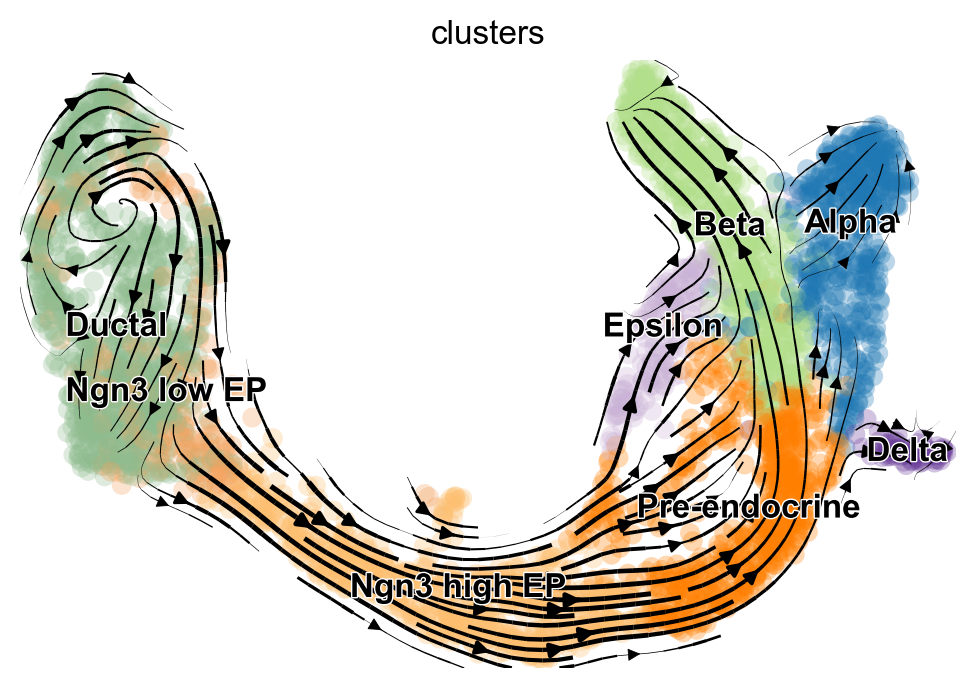

In [2]:
import scvelo as scv
import scanpy as sc

# 1. 设置画图风格（让图更好看）
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')

# 2. 下载并加载胰腺示例数据
# 注意：第一次运行这里会下载数据，可能需要等几十秒
adata = scv.datasets.pancreas()

# 打印看看 adata 长什么样
print(adata)
# 看看细胞的“身份证”前 5 行
print(adata.obs.head())


# 3. 预处理：过滤和计算矩
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

# 4. 核心计算：算出 RNA 速率
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

# 5. 画出结果图
scv.pl.velocity_embedding_stream(adata, basis='umap', color='clusters')